In [3]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from ModelIllustration import *

import math

plt.style.use('science')

In [274]:
def DrawPlotAxes(BGLoc, BGScale, axesDirList, ax, Label=""):
    
    if Label=="":
        Labels=[""]*(len(axesDir))
    else :
        Labels = Label
    
    for idx,Dir in enumerate(axesDirList):
        ax.annotate("", 
                    xytext=(BGLoc[0]-0.5*(Dir[0])*BGScale,BGLoc[1]-0.5*(Dir[1])*BGScale), 
                    xy=(BGLoc[0]+0.5*(Dir[0])*BGScale,BGLoc[1]+0.5*(Dir[1])*BGScale),
                    arrowprops=dict(arrowstyle="->"),horizontalalignment='left')
        ax.annotate(Labels[idx], 
                    xytext=(BGLoc[0]-0.7*(Dir[0])*BGScale,BGLoc[1]-0.7*(Dir[1])*BGScale),
                    xy=(BGLoc[0],BGLoc[1]),
                    horizontalalignment='center',
                    verticalalignment = 'center'
                   )


def LocateSlipReceivers_MeshAligned(ax,loc,Color):
    OffsetY = 2*loc[1]

    MarkerSpecs = {"marker":".","facecolors":Color,"edgecolors":"k","s":300,"zorder":9}
    ax.scatter(loc[0],loc[1], **MarkerSpecs)
    ax.scatter(loc[0],loc[1]-OffsetY, **MarkerSpecs)
        
def GenKostrovCase(ax):
    Delta = 0.02
    
    ####### Add Grid and axis specs
    ax.set_xlim(-.1,.9)
    ax.set_ylim(-.5,.5)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(.02))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(.02))
    ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
    ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
    ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
    ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    #####################################


    ####### Add patches

    ax.add_patch(
                 patches.Rectangle((-1, -Delta), 2., 2*Delta, fill=True, color="lightgray" ) 
                ) 
    ax.add_patch(
                 patches.Rectangle((-1, -Delta), 2., 2*Delta, fill=False ) 
                ) 
    #####################################


    ####### Add axes of shear and normal background stress

    BGLoc = [0.05,0.25]
    BGScale = 0.15
    axesDir = [[0,-1],[1,0]]
    Label = ['$-\sigma^b_{22}$','$\sigma^b_{12}$']
    DrawPlotAxes(BGLoc, BGScale, axesDir,ax, Label)
    #####################################

    
    ###### Outside Arrows
    OffsetArr = 0.02
    
    ax.annotate('', xy=(-OffsetArr, 0), xycoords='axes fraction', xytext=(-OffsetArr,1), 
            arrowprops=dict(arrowstyle="<->", color='k'))
    
    ax.annotate('', xy=(0, -OffsetArr), xycoords='axes fraction', xytext=(1, -OffsetArr), 
            arrowprops=dict(arrowstyle="<->", color='k'))
    
    bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0)
    
    ax.annotate('$x$', xy=(0.5, -OffsetArr-.01), xycoords='axes fraction', bbox=bbox)
    ax.annotate('$y$', xy=(-OffsetArr-.01, 0.5), xycoords='axes fraction', bbox=bbox)

    ########################################

    ####### 
    BGLoc = [.5, 0]
    BGScale = 2*Delta
    Dir = [0,-1]
    Label = ['2$\delta$']
    ax.annotate("", 
                xytext=(BGLoc[0]-0.5*(Dir[0])*BGScale,BGLoc[1]-0.5*(Dir[1])*BGScale), 
                xy=(BGLoc[0]+0.5*(Dir[0])*BGScale,BGLoc[1]+0.5*(Dir[1])*BGScale),
                arrowprops=dict(arrowstyle="<->"),horizontalalignment='left')
    ax.annotate(Label[0], 
                xytext=(BGLoc[0]+.02,BGLoc[1]), 
                xy=(BGLoc[0],BGLoc[1]),
                horizontalalignment='left',verticalalignment = 'center')
    #####################################
    
    for i in [0,1,2,3,4]:
        loc=[0.2*i,0.02]

        LocateSlipReceivers_MeshAligned(ax,loc,np.array(cmapProf[-i-1])/255)

In [275]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [276]:
StressTensor = np.array([[0 , 20], [20, -40]])
StressEigVal, StressEigVec = np.linalg.eig(StressTensor)

In [277]:
def LocateSlipReceivers_MeshAligned(ax,loc,Color):
    OffsetY = 2*loc[1]

    MarkerSpecs = {"marker":".","facecolors":Color,"edgecolors":"k","s":300,"zorder":9}
    ax.scatter(loc[0],loc[1], **MarkerSpecs)
    ax.scatter(loc[0],loc[1]-OffsetY, **MarkerSpecs)
    
from palettable.cartocolors.qualitative import Safe_5 as LineColor

cmapProf = LineColor.colors

In [278]:
cmapProf[0]

[136, 204, 238]

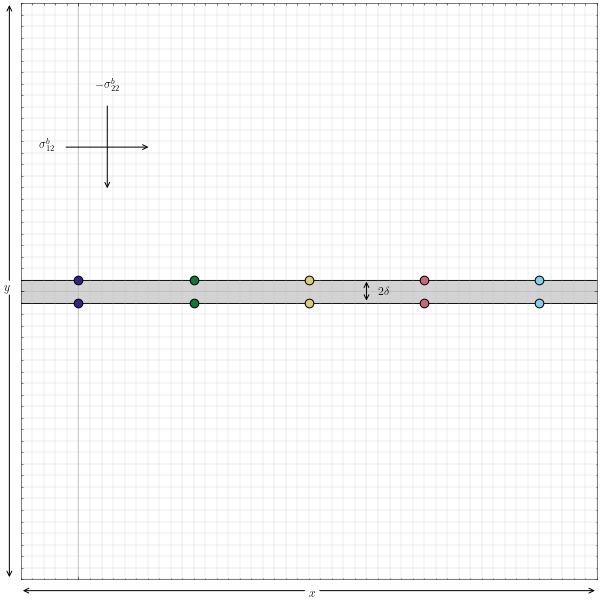

In [279]:
ax = plt.axes([0, -1, 2, 2])

GenKostrovCase(ax)



plt.show()

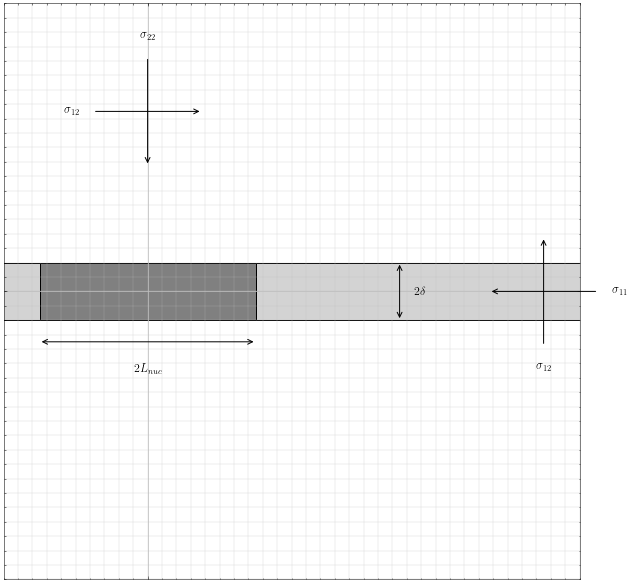

In [280]:
ax = plt.axes([-1, -1, 2, 2])

GenTPV3Case(ax)

plt.show()